In [1]:
import os
import math

In [2]:
os.chdir('yolov10')

In [3]:
ls

 Volume in drive D is Docunment
 Volume Serial Number is FE54-3F20

 Directory of D:\Deep Learning\Yolo Project\yolov10

09/13/2024  04:00 PM    <DIR>          .
09/13/2024  04:00 PM    <DIR>          ..
09/13/2024  10:16 AM             2,468 .gitignore
09/13/2024  10:16 AM             2,391 .pre-commit-config.yaml
09/13/2024  10:16 AM             5,688 app.py
09/13/2024  10:16 AM             5,681 CONTRIBUTING.md
09/13/2024  10:16 AM    <DIR>          docker
09/13/2024  10:16 AM    <DIR>          docs
09/13/2024  10:16 AM    <DIR>          examples
09/13/2024  10:16 AM    <DIR>          figures
09/13/2024  10:16 AM               219 flops.py
09/13/2024  10:16 AM            35,184 LICENSE
09/13/2024  10:16 AM    <DIR>          logs
09/13/2024  10:16 AM            32,631 mkdocs.yml
09/13/2024  10:16 AM             7,003 pyproject.toml
09/13/2024  10:16 AM            12,545 README.md
09/13/2024  10:16 AM               281 requirements.txt
09/13/2024  10:16 AM    <DIR>          tests
09/1

In [4]:
import cv2
from ultralytics import  YOLOv10

In [5]:
model = YOLOv10('weights/yolov10n.pt')

In [6]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as imd

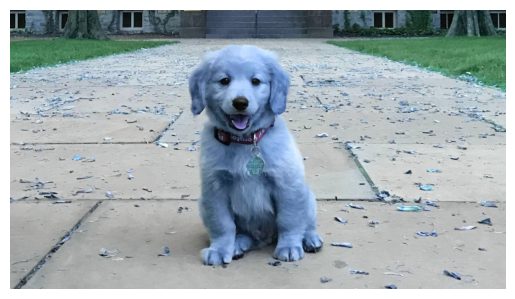

In [7]:
image = cv2.imread('../KOA_Nassau_2697x1517.jpg')
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
result = model(image)[0]


0: 384x640 1 16, 616.6ms
Speed: 10.0ms preprocess, 616.6ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


In [9]:
classNames = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
              "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
              "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
              "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat",
              "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup",
              "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli",
              "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa", "pottedplant", "bed",
              "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard", "cell phone",
              "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
              "teddy bear", "hair drier", "toothbrush"
              ]

In [10]:
for r in result:
    boxes = r.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        confidence = math.ceil(box.conf[0]*100)/100
        print("Confidence :",confidence)

        cls = int(box.cls[0])
        print(classNames[cls])

Confidence : 0.94
dog


In [11]:
cv2.namedWindow('example',cv2.WINDOW_NORMAL)
cv2.imshow('example',image)
cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 255), 3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
 for r in result:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            confidence = math.ceil(box.conf[0]*100)/100
            print("Confidence :",confidence)
            cls = int(box.cls[0])
            print(classNames[cls])

Confidence : 0.94
dog


In [15]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    result = model(frame)[0]
    for r in result:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)   
            cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 3)
            confidence = math.ceil(box.conf[0]*100)/100
            print("Confidence :",confidence)
            cls = int(box.cls[0])
            print(classNames[cls])
            text = cv2.putText(frame,classNames[cls],org = (x1,y1-5),fontFace=cv2.FONT_HERSHEY_COMPLEX_SMALL,fontScale=2,color=(255, 0, 255),thickness=1,lineType= cv2.LINE_8,bottomLeftOrigin = False)
            
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 0, 547.7ms
Speed: 7.0ms preprocess, 547.7ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.95
person

0: 480x640 1 0, 664.7ms
Speed: 74.0ms preprocess, 664.7ms inference, 12.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.95
person

0: 480x640 1 0, 555.9ms
Speed: 7.0ms preprocess, 555.9ms inference, 10.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.95
person

0: 480x640 1 0, 537.1ms
Speed: 9.0ms preprocess, 537.1ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.95
person

0: 480x640 1 0, 527.4ms
Speed: 23.0ms preprocess, 527.4ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.96
person

0: 480x640 1 0, 543.0ms
Speed: 6.0ms preprocess, 543.0ms inference, 6.0ms postprocess per image at shape (1, 3, 480, 640)
Confidence : 0.96
person

0: 480x640 1 0, 559.1ms
Speed: 13.0ms preprocess, 559.1ms inference, 7.0ms postprocess per image at shape (